In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import glob
import pickle as pkl
from scipy.stats import gaussian_kde, linregress

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [80]:
dic = pkl.load( open('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_t2mtosm_8km_savefile1.p', "rb"))#(open('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_t2mtosm_8km_savefile.p', "rb"))

In [81]:
dic

{'sm_anom': array([ 0.0000000e+00,  1.6345974e-23,  7.9061533e-25, ...,
        -2.7632266e-03, -1.0092184e-03,  0.0000000e+00], dtype=float32),
 't_anom': array([-0.07998657,  0.17773438, -0.02877808, ..., -0.7555237 ,
        -0.6749573 , -0.5546875 ], dtype=float32)}

In [82]:
def calc_density(v1,v2):

    xy = np.vstack([v1, v2])

    z = gaussian_kde(xy)(xy)

    return z / (z.max() - z.min())


In [421]:
sm_anom = dic['sm_anom']
t_anom = dic['t_anom']

In [422]:
np.percentile(np.abs(sm_anom),50)

0.004453003406524658

In [423]:
np.percentile(np.abs(t_anom),50)

0.420654296875

In [424]:
from endgame import hist2d

In [425]:
sdic = hist2d.basic_1d_binning(sm_anom, np.linspace(np.min(sm_anom), np.max(sm_anom),20))
tdic = hist2d.basic_1d_binning(t_anom, np.linspace(np.min(t_anom), np.max(t_anom),20))

In [426]:
sdic.keys()

dict_keys(['nb', 'xbins'])

(-4.0, 4.0)

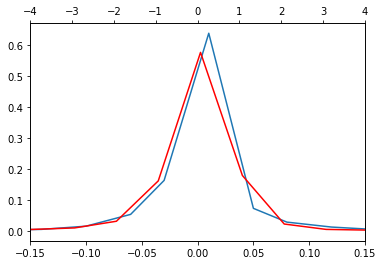

In [427]:
f = plt.figure()
ax = f.add_subplot(111)

ax.plot(sdic['xbins'], sdic['nb']/np.sum(sdic['nb']))
ax.set_xlim(-0.15,0.15)
ax1 = ax.twiny()
ax1.plot(tdic['xbins'], tdic['nb']/np.sum(tdic['nb']), color='r')
ax1.set_xlim(-4,4)

In [428]:
mask=  (sm_anom<-0.005) | (sm_anom>0.005)   #( ((t_anom>-3) & (t_anom<3)) )|
#mask= ((t_anom>-3) & (t_anom<3) & ((t_anom<-0.01) | (t_anom>0.01)) ) & ((sm_anom<-0.01) | (sm_anom>0.01))
tmask = ((t_anom>0.1)  & ((0.02<sm_anom) | (sm_anom<-0.02))) | (( t_anom<-0.1) & ((0.02<sm_anom) | (sm_anom<-0.02))) 
sm_anom = np.array(sm_anom)[mask]
t_anom = np.array(t_anom)[mask]

In [429]:
np.sum(mask)

16163

In [430]:
np.sum(negmask)

1727

In [431]:
np.sum(negmask)/np.sum(np.isfinite(dic['sm_anom']))

0.05264762369295491

In [432]:
np.sum(mask)/np.sum(np.isfinite(dic['sm_anom']))

0.49272932353748133

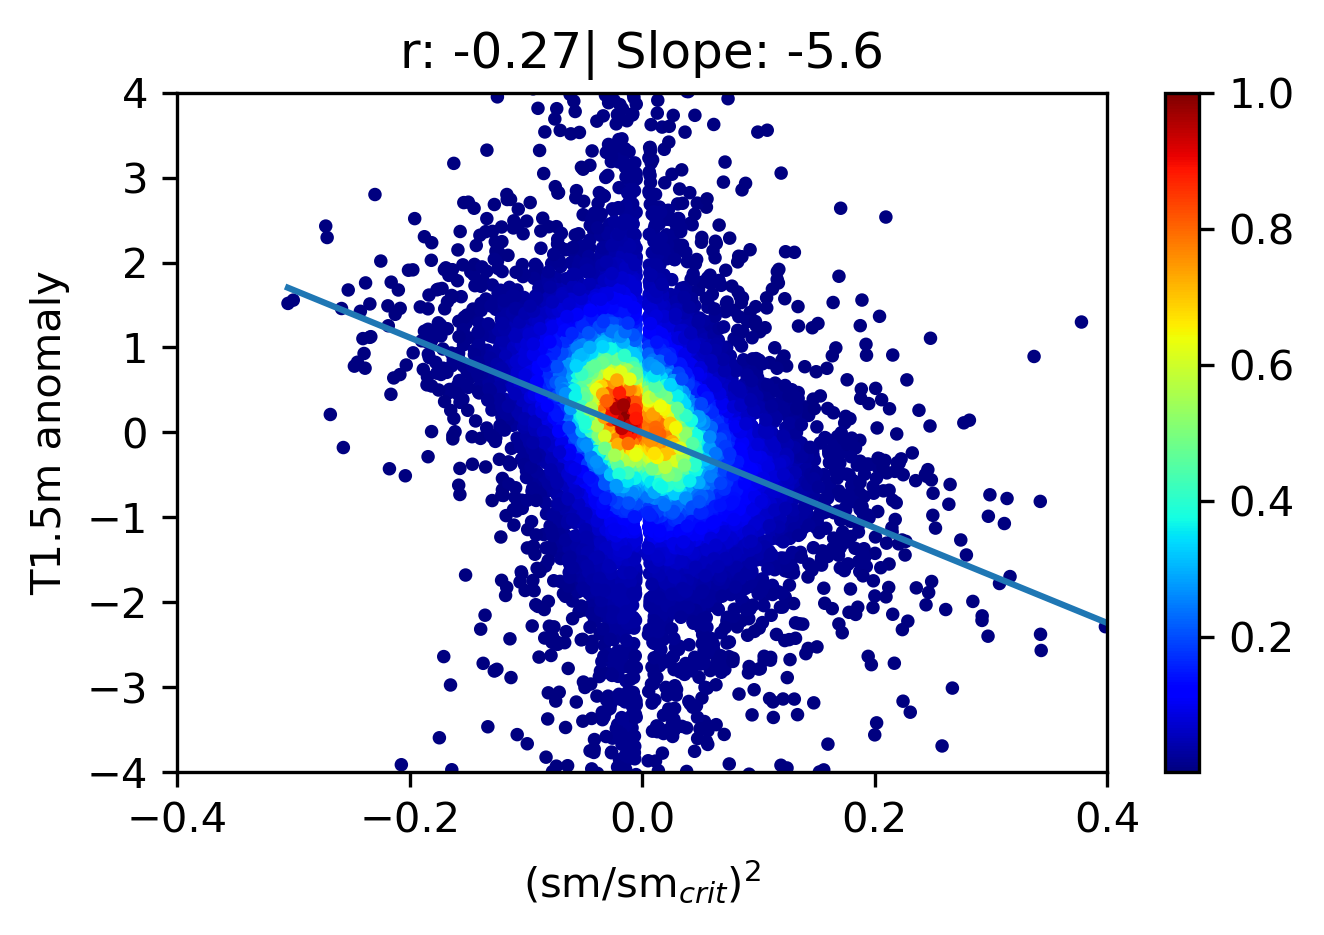

In [433]:
x = sm_anom
y = t_anom

slope, intercept, r, p, std_err = linregress(x, y)

density = calc_density(x,y)
f=plt.figure(figsize=(5,3),dpi=300)
ax = f.add_subplot(111)
plt.scatter(x,y, c=density, s=5, cmap='jet')
#plt.plot(intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.plot(np.linspace(np.min(x), np.max(x),10), intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.title('r: '+str(np.round(r,2))+'| Slope: '+str(np.round(slope,2)))
plt.xlabel(r'(sm/sm$_{crit}$)$^2$')
plt.ylabel('T1.5m anomaly')
ax.set_ylim(-4,4)
ax.set_xlim(-0.4,0.4)
plt.colorbar()
f.savefig('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_8on640_sensiTest.jpg')

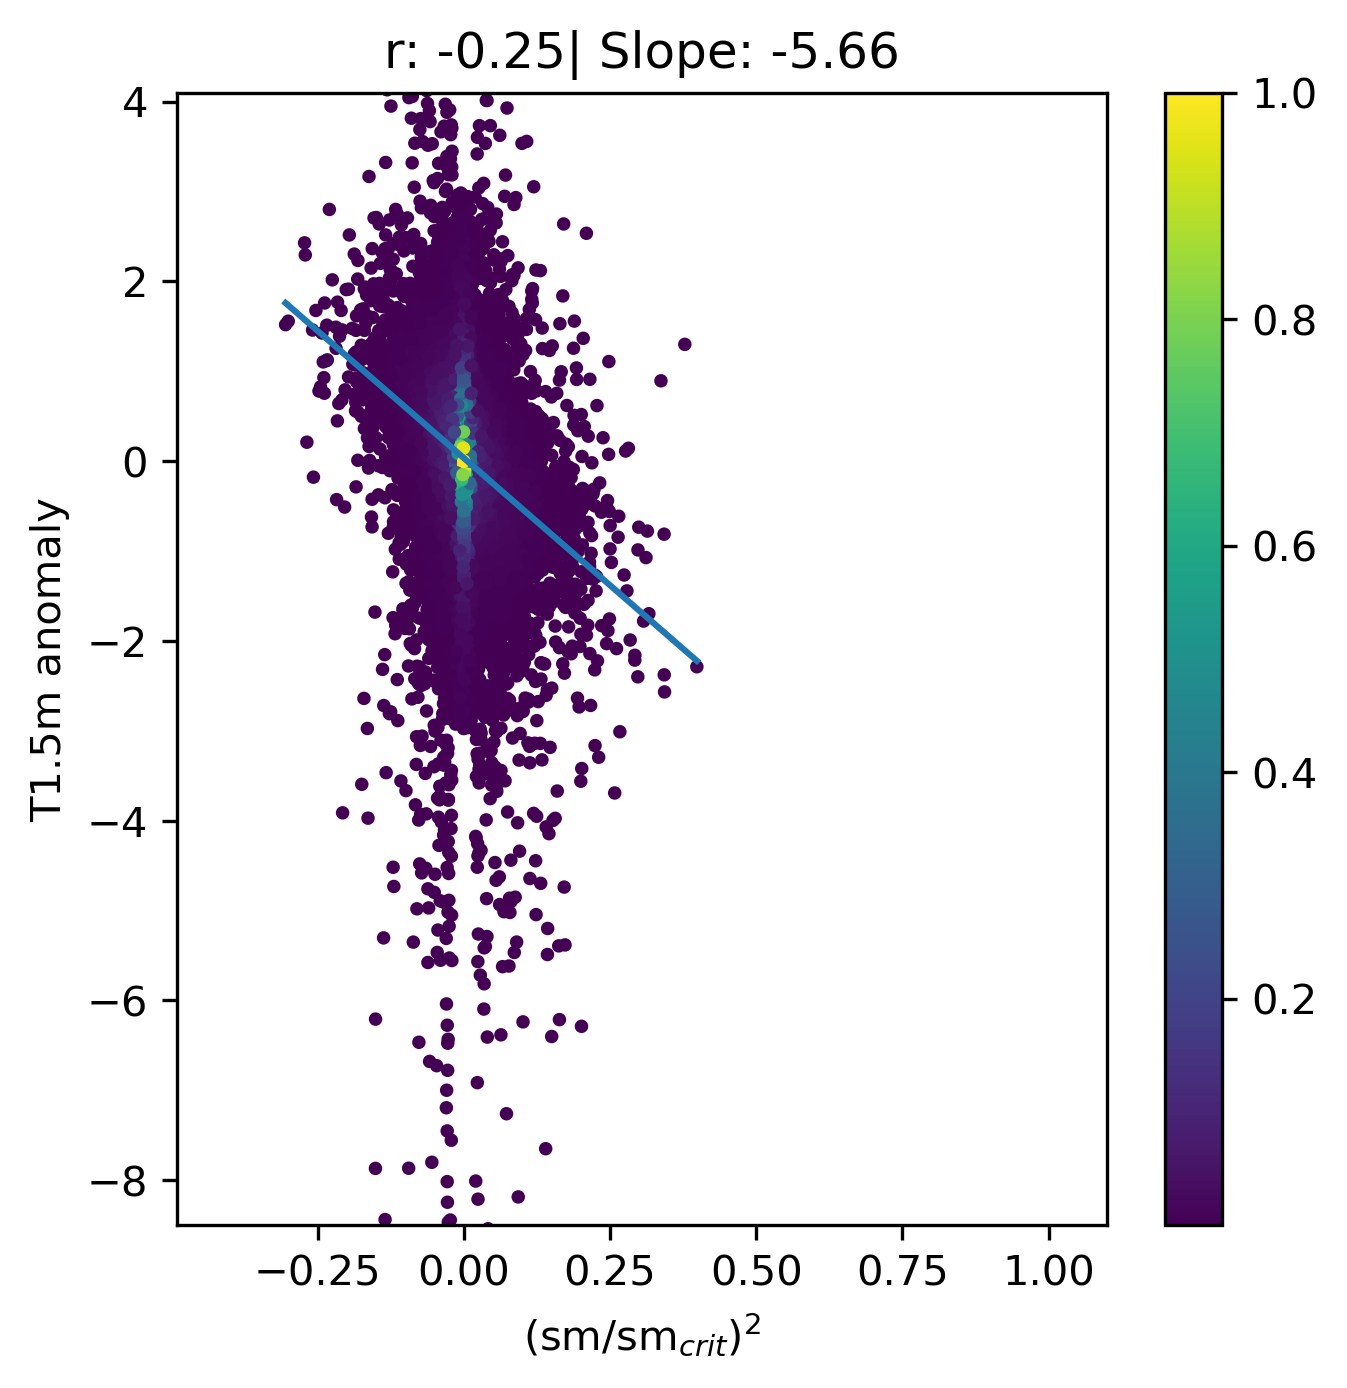

In [387]:
x = sm_anom
y = t_anom

slope, intercept, r, p, std_err = linregress(x, y)

density = calc_density(x,y)
f=plt.figure(figsize=(5,5),dpi=300)
ax = f.add_subplot(111)
plt.scatter(x,y, c=density, s=5)
#plt.plot(intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.plot(np.linspace(np.min(x), np.max(x),10), intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.title('r: '+str(np.round(r,2))+'| Slope: '+str(np.round(slope,2)))
plt.xlabel(r'(sm/sm$_{crit}$)$^2$')
plt.ylabel('T1.5m anomaly')
ax.set_ylim(-8.5,4.1)
ax.set_xlim(-0.49,1.1)
plt.colorbar()
#f.savefig('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_setlim.jpg')

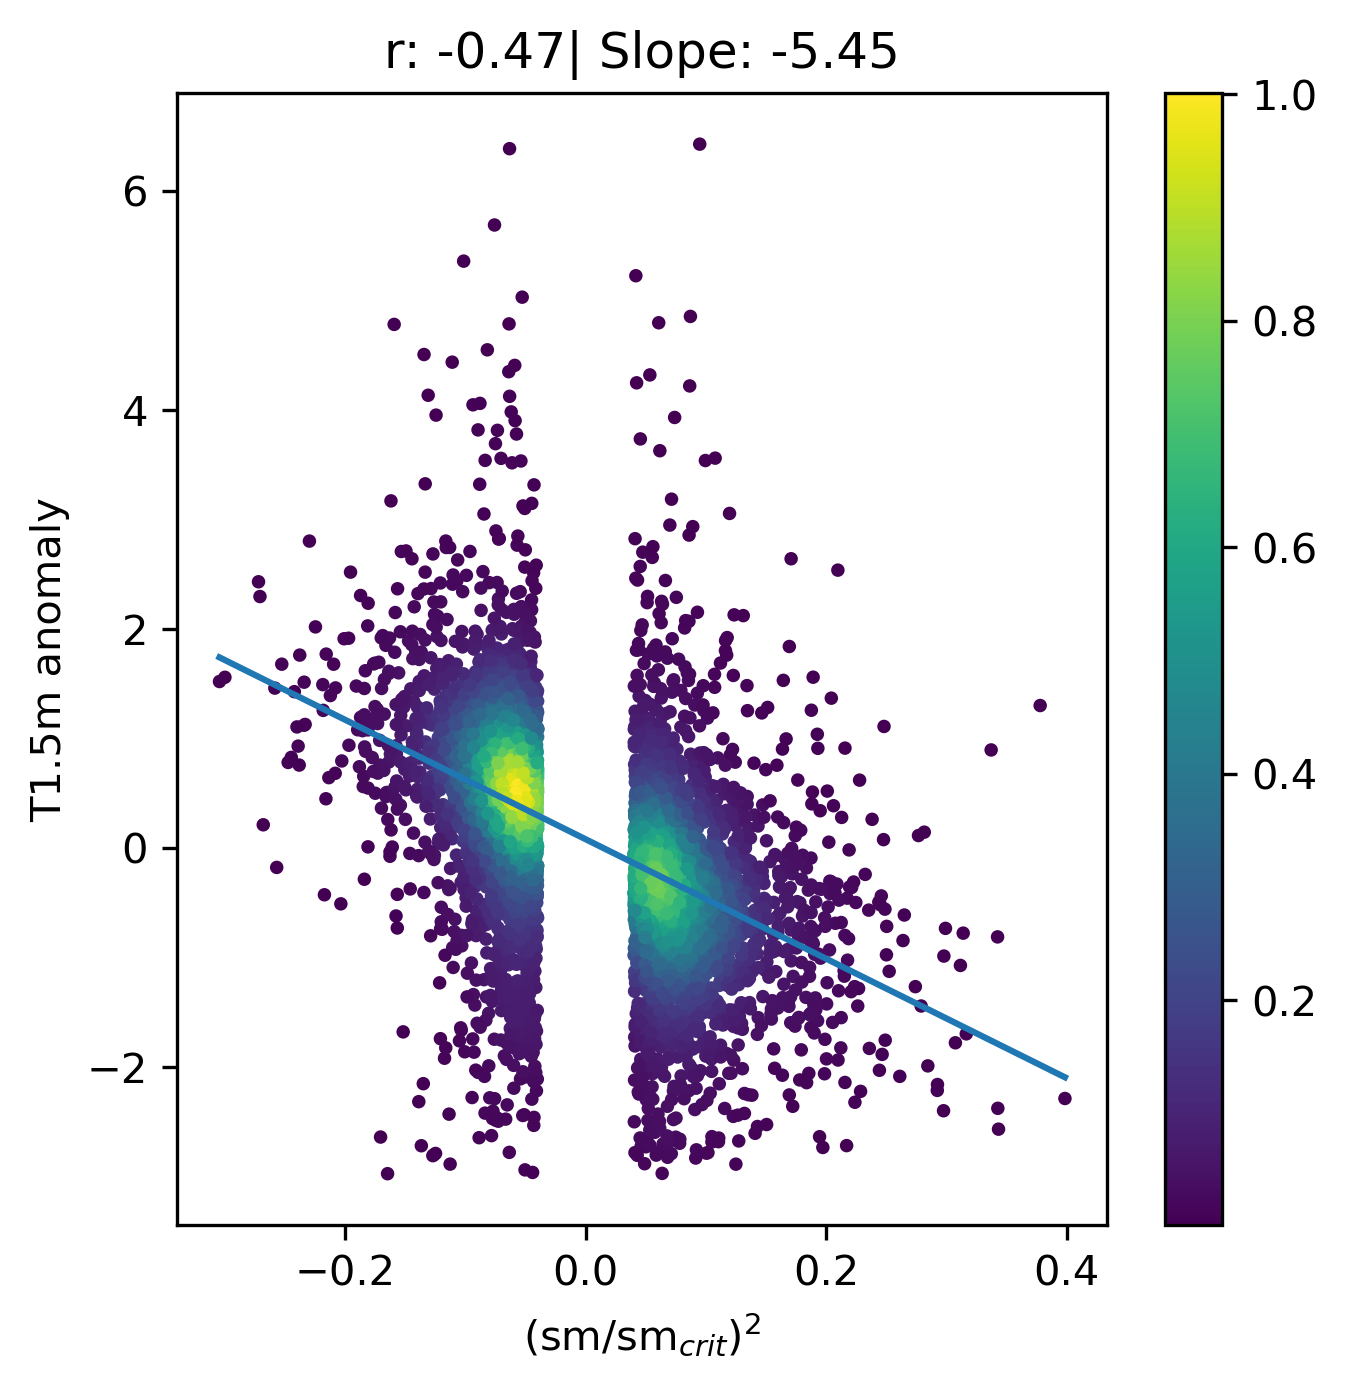

In [75]:
x = sm_anom
y = t_anom

slope, intercept, r, p, std_err = linregress(x, y)

density = calc_density(x,y)
f=plt.figure(figsize=(5,5),dpi=300)
ax = f.add_subplot(111)
plt.scatter(x,y, c=density, s=5)
#plt.plot(intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.plot(np.linspace(np.min(x), np.max(x),10), intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.title('r: '+str(np.round(r,2))+'| Slope: '+str(np.round(slope,2)))
plt.xlabel(r'(sm/sm$_{crit}$)$^2$')
plt.ylabel('T1.5m anomaly')
#ax.set_ylim(-4,4)
#ax.set_xlim(-0.4,0.4)
plt.colorbar()
#f.savefig('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_nosetlim.jpg')